# Visual training error from Log file

In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
logfile = './Log.txt'
lossDetectorClassifier = []
lossDetectorRegression = []
lossRPNClassifier = []
lossRPNRegression = []
classifierAccuracy = []
saveState = []
lastTrainData = []

In [3]:
epochre = re.compile('Epoch\s+(\d+)/')
lossDetectorClassifierRe = re.compile('Loss Detector classifier.*(\d+\.\d+(e[+-]?\d+)?)')
lossDetectorRegressionRe = re.compile('Loss Detector regression.*(\d+\.\d+(e[+-]?\d+)?)')
lossRPNClassifierRe = re.compile('Loss RPN classifier.*(\d+\.\d+(e[+-]?\d+)?)')
lossRPNRegressionRe = re.compile('Loss RPN regression.*(\d+\.\d+(e[+-]?\d+)?)')
classifierAccuracyRe = re.compile('Classifier accuracy.*(\d+\.\d+(e[+-]?\d+)?)')
saveRE = re.compile('Total loss.*to\s(\d+\.\d+)')
lastTrainLineRe = re.compile('1000/1000')
lastTrainLineDataRe = re.compile('\:\s+(\d+\.\d+(?:e[+-]?\d+)?)')

In [4]:
epoch = 0
saveLast = 0
i = 0
with open(logfile,'r') as fp:
    for line in fp:
        epochCheck = epochre.match(line)
        #epoch = int(epochCheck.groups()[0]) if epochCheck is not None else epoch
        if epochCheck: epoch += 1
        ldc = lossDetectorClassifierRe.match(line)
        ldr = lossDetectorRegressionRe.match(line)
        lrc = lossRPNClassifierRe.match(line)
        lrr = lossRPNRegressionRe.match(line)
        ca  = classifierAccuracyRe.match(line)
        se  = saveRE.match(line)
        ltl = lastTrainLineRe.match(line)
        if ldc is not None: lossDetectorClassifier.append(float(ldc.groups()[0]))
        if ldr is not None: lossDetectorRegression.append(float(ldr.groups()[0]))
        if lrc is not None: lossRPNClassifier.append(float(lrc.groups()[0]))
        if lrr is not None: lossRPNRegression.append(float(lrr.groups()[0]))
        if ca is not None:  classifierAccuracy.append(float(ca.groups()[0]))
        if se is not None: saveState.append([epoch,float(se.groups()[0])])
        if ltl is not None: lastTrainData.append(list(map(float,lastTrainLineDataRe.findall(line))))

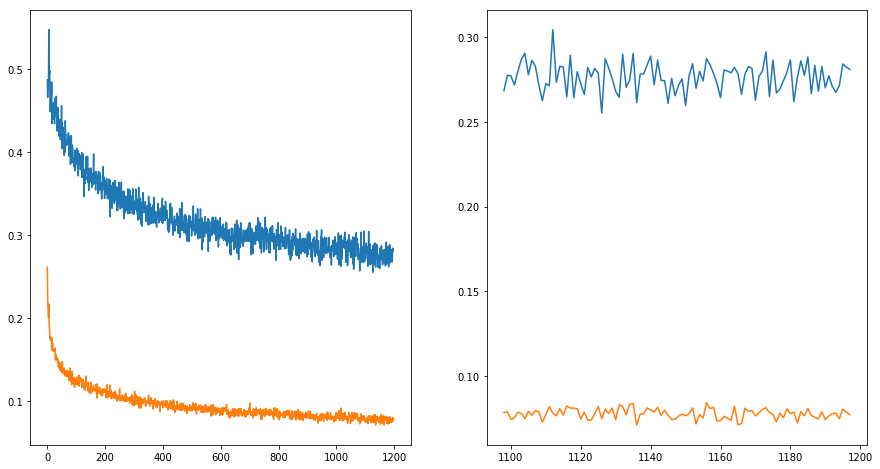

In [5]:
fromEnd = 100
x = range(len(lossDetectorClassifier))
f = plt.figure(figsize=(15,8))
ax0 = f.add_subplot(1,2,1)
ax1 = f.add_subplot(1,2,2)
ax0.plot(x,lossDetectorClassifier,x,lossDetectorRegression)
ax1.plot(x[-fromEnd:],lossDetectorClassifier[-fromEnd:],x[-fromEnd:],lossDetectorRegression[-fromEnd:])



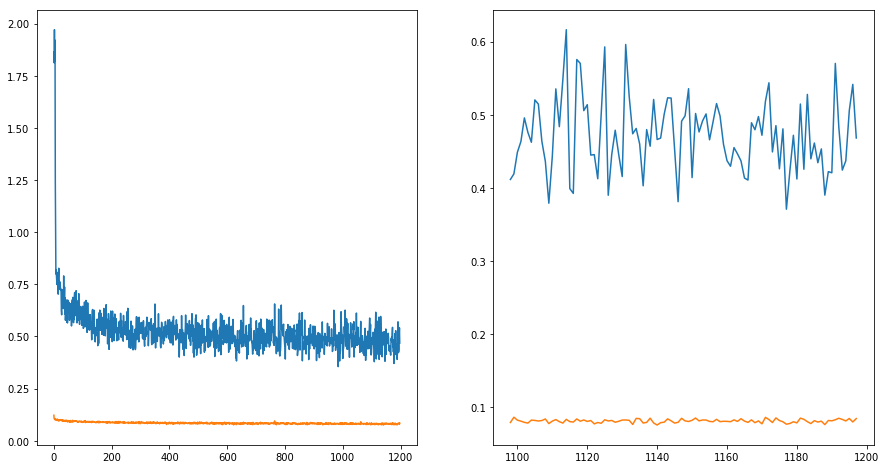

In [6]:
f = plt.figure(figsize=(15,8))
ax0 = f.add_subplot(1,2,1)
ax1 = f.add_subplot(1,2,2)
ax0.plot(x,lossRPNClassifier,x,lossRPNRegression)
ax1.plot(x[-fromEnd:],lossRPNClassifier[-fromEnd:],x[-fromEnd:],lossRPNRegression[-fromEnd:])

In [7]:
xsave = [ x for x,y in saveState]
ysave = [ y for x,y in saveState]

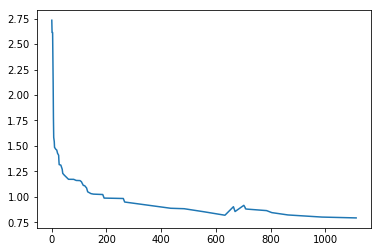

In [8]:
plt.plot(xsave,ysave)

In [9]:
print('Last epoch={}'.format(xsave[-1]))
print('Total error in last model={}'.format(ysave[-1]))
lastepoch = xsave[-1]

Last epoch=1112
Total error in last model=0.7917409104935571


In [10]:
line='1000/1000 [==============================] - 917s 917ms/step - rpn_cls: 0.0037 - rpn_regr: 0.0284 - detector_cls: 0.2168 - detector_regr: 0.0484'

In [11]:
x = range(len(lastTrainData))

In [12]:
rpn_cls = [ y for y,_,_,_ in lastTrainData]
rpn_rgn = [ y for _,y,_,_ in lastTrainData]
detector_cls = [ y for _,_,y,_ in lastTrainData]
detector_rgn = [ y for _,_,_,y in lastTrainData]

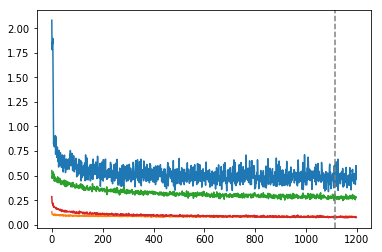

In [13]:
plt.plot(x,rpn_cls,x,rpn_rgn,x,detector_cls,x,detector_rgn)
plt.axvline(x=xsave[-1],color='grey',linestyle='--')

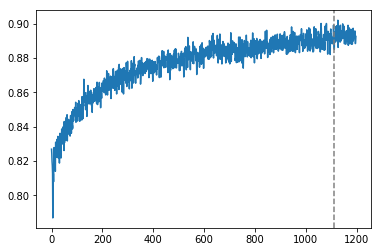

In [14]:
plt.plot(x,classifierAccuracy)
plt.axvline(x=xsave[-1],color='grey',linestyle='--')

In [15]:
print(
"""Last values saved
last save rpn_cls =      {}
last save rpn_rgn =      {}
last save detector_cls = {}
last save detector_rgn = {}
last save accuracy =     {}
""".format(rpn_cls[lastepoch],rpn_rgn[lastepoch],
    detector_cls[lastepoch],detector_rgn[lastepoch],
    classifierAccuracy[lastepoch]))

Last values saved
last save rpn_cls =      0.4744
last save rpn_rgn =      0.0802
last save detector_cls = 0.3132
last save detector_rgn = 0.0829
last save accuracy =     0.88515625



In [16]:
print(
"""Current iteration status
current rpn_cls =      {}
current rpn_rgn =      {}
current detector_cls = {}
current detector_rgn = {}
current accuracy =     {}
""".format(rpn_cls[-1],rpn_rgn[-1],
    detector_cls[-1],detector_rgn[-1],
    classifierAccuracy[-1]))

Current iteration status
current rpn_cls =      0.4641
current rpn_rgn =      0.0803
current detector_cls = 0.2794
current detector_rgn = 0.0731
current accuracy =     0.89265625



In [17]:
saveData = (lossDetectorClassifier,
            lossDetectorRegression,
            lossRPNClassifier,
            lossRPNRegression,
            classifierAccuracy,
            saveState,
            lastTrainData)

In [18]:
import json
with open('LogData.json','w') as fp:
    json.dump(saveData,fp,indent=1)

In [19]:
lastepoch

1112